## Polynomial Linear Regression

#### Why is Polynomial Linear Regression "Linear" ?
The answer lies the equation on how polynomial linear regression is implemented. The outcome y is defined as the linear<br> combination of the independent variables. That's the reason it is linear. The outcome has nothing to do with the non- linearities in the independent variables <br>
<br>
Consider the equation : y = b0 + b1x + b2x^2 + b3x^3  --> Only b [coefficients] decides, i'ts linear or polynomial.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = data.iloc[: , 1:2] # it means, select all rows and (1 to n-1) [n = 2] columns
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [4]:
y = data.iloc[: , 2] #se;ect all rows and 2th index [ starts from 0th index ]
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Add Polynomial features using PolynomialFeatures class from sklearn.preprocessing

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree = 2)
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)

poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg_4.fit_transform(X)

In [7]:
X_poly_2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [8]:
X_poly_3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [13]:
X_poly_4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

#### Notice that the first column containing 1 is already added automatically
<br>
<br>
#### Now we can make LinearRegression object using these newly added polynomial features

In [14]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y)

lin_reg_poly_4 = LinearRegression().fit(X_poly_4, y)

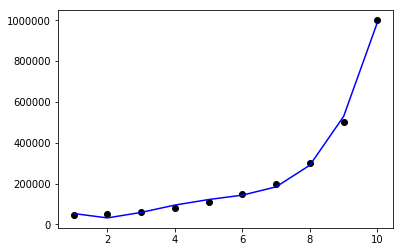

In [20]:
plt.scatter(X, y, color='black')
# plt.plot(X, lin_reg.predict(X), color='b')
# plt.plot(X, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)), color='g')
# plt.plot(X, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)), color='r')

plt.plot(X, lin_reg_poly_4.predict(poly_reg_4.fit_transform(X)), color='b')  # degree 4 perfectly fits the data
plt.show()